In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [2]:
file_path = "./Resources/GlobalLandTemperaturesByState.csv"
global_temp_df = pd.read_csv(file_path)
global_temp_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [3]:
# cast to to datetime
dt= lambda df_: pd.to_datetime(df_['dt'])

In [4]:
# Extract average Temp across the world since the begining of the 1900
global_temp_df = global_temp_df.loc[(global_temp_df['dt'] >= '1900-01-01')]
global_temp_df.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
536,1900-01-01,25.732,1.080,Acre,Brazil
537,1900-02-01,26.050,1.080,Acre,Brazil
538,1900-03-01,26.574,0.894,Acre,Brazil
539,1900-04-01,25.947,1.192,Acre,Brazil
540,1900-05-01,25.557,0.856,Acre,Brazil


In [5]:
# drop the null values
cleanglobal_temp_df = global_temp_df.dropna()
cleanglobal_temp_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
536,1900-01-01,25.732,1.080,Acre,Brazil
537,1900-02-01,26.050,1.080,Acre,Brazil
538,1900-03-01,26.574,0.894,Acre,Brazil
539,1900-04-01,25.947,1.192,Acre,Brazil
540,1900-05-01,25.557,0.856,Acre,Brazil


In [6]:
# Make a copy of the data for future use
copy = cleanglobal_temp_df.copy()

In [7]:
# Recode the Columns
cleanglobal_temp_df = cleanglobal_temp_df.rename(columns={"dt":"Date",
                                                  "AverageTemperature":"Avg_temp",
                                                  "AverageTemperatureUncertainty":"Avg_temp_Uncer",
                                                  "State":"State",
                                                  "Country":"Country"})
cleanglobal_temp_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Avg_temp,328784.0,9.767931,13.931064,-45.389,0.399,12.196,20.91625,36.339
Avg_temp_Uncer,328784.0,0.417751,0.319615,0.036,0.238,0.330,0.48600,7.638


In [8]:
# Create 'Date' and 'Year' columns
copy['Date'] = pd.to_datetime(copy.dt)
copy['Year'] = copy['Date'].dt.year
Global_temp =copy.reset_index()
Global_temp.head()

,index,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,536,1900-01-01,25.732,1.080,Acre,Brazil,1900-01-01,1900
1,537,1900-02-01,26.050,1.080,Acre,Brazil,1900-02-01,1900
2,538,1900-03-01,26.574,0.894,Acre,Brazil,1900-03-01,1900
3,539,1900-04-01,25.947,1.192,Acre,Brazil,1900-04-01,1900
4,540,1900-05-01,25.557,0.856,Acre,Brazil,1900-05-01,1900


In [9]:
# drop  the 'dt' column
Global_temp.drop(columns = ['dt'], axis = 1, inplace = True)
Global_temp.head()

,index,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,536,25.732,1.080,Acre,Brazil,1900-01-01,1900
1,537,26.050,1.080,Acre,Brazil,1900-02-01,1900
2,538,26.574,0.894,Acre,Brazil,1900-03-01,1900
3,539,25.947,1.192,Acre,Brazil,1900-04-01,1900
4,540,25.557,0.856,Acre,Brazil,1900-05-01,1900


In [10]:
# drop  the 'index' column
Global_temp.drop(columns = ['index'], axis = 1, inplace = True)
Global_temp.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year
0,25.732,1.080,Acre,Brazil,1900-01-01,1900
1,26.050,1.080,Acre,Brazil,1900-02-01,1900
2,26.574,0.894,Acre,Brazil,1900-03-01,1900
3,25.947,1.192,Acre,Brazil,1900-04-01,1900
4,25.557,0.856,Acre,Brazil,1900-05-01,1900


# Preprocessing

In [11]:
# Find Average temp
Global_temp_avg_temp = Global_temp["AverageTemperature"].mean()
Global_temp_avg_temp

9.767931197990121

In [12]:
#Adding a new column where 1 is above avg temp values and 0 below avg temp values
Global_temp['Above Avg Temp']= Global_temp['AverageTemperature'].apply(lambda x: '1' if x >= Global_temp['AverageTemperature'].mean() else '0')
                
Global_temp.head()

,AverageTemperature,AverageTemperatureUncertainty,State,Country,Date,Year,Above Avg Temp
0,25.732,1.080,Acre,Brazil,1900-01-01,1900,1
1,26.050,1.080,Acre,Brazil,1900-02-01,1900,1
2,26.574,0.894,Acre,Brazil,1900-03-01,1900,1
3,25.947,1.192,Acre,Brazil,1900-04-01,1900,1
4,25.557,0.856,Acre,Brazil,1900-05-01,1900,1


In [13]:
#  Remove Average Temperature
ml_df= Global_temp[['Above Avg Temp','AverageTemperatureUncertainty','Country','State', 'Year']]

ml_df.head()

,Above Avg Temp,AverageTemperatureUncertainty,Country,State,Year
0,1,1.080,Brazil,Acre,1900
1,1,1.080,Brazil,Acre,1900
2,1,0.894,Brazil,Acre,1900
3,1,1.192,Brazil,Acre,1900
4,1,0.856,Brazil,Acre,1900


In [14]:
w_DTTemp_df = ml_df.copy()

In [15]:
#Transforming the column 'State' from text to numerical value
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

w_DTTemp_df['State'] = le.fit_transform(w_DTTemp_df['State'])
w_DTTemp_df.head()

,Above Avg Temp,AverageTemperatureUncertainty,Country,State,Year
0,1,1.080,Brazil,0,1900
1,1,1.080,Brazil,0,1900
2,1,0.894,Brazil,0,1900
3,1,1.192,Brazil,0,1900
4,1,0.856,Brazil,0,1900


In [16]:
#Transforming the column 'Country' from text to numerical value
le = LabelEncoder()

w_DTTemp_df['Country'] = le.fit_transform(w_DTTemp_df['Country'])
w_DTTemp_df.head()

,Above Avg Temp,AverageTemperatureUncertainty,Country,State,Year
0,1,1.080,1,0,1900
1,1,1.080,1,0,1900
2,1,0.894,1,0,1900
3,1,1.192,1,0,1900
4,1,0.856,1,0,1900


In [17]:
# Define features set
X = w_DTTemp_df
X = X.drop("Above Avg Temp", axis=1)
X.head()

,AverageTemperatureUncertainty,Country,State,Year
0,1.080,1,0,1900
1,1.080,1,0,1900
2,0.894,1,0,1900
3,1.192,1,0,1900
4,0.856,1,0,1900


In [18]:
# Define target vector
y = w_DTTemp_df["Above Avg Temp"].values.reshape(-1, 1)
y[:5]

array([['1'],
       ['1'],
       ['1'],
       ['1'],
       ['1']], dtype=object)

In [19]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [20]:
## Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(246588, 4)
(82196, 4)
(246588, 1)
(82196, 1)


In [21]:
# Splitting into Train and Test sets into an 80/20 split.( manually specify the desired split with the train_size parameter)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=78, train_size=0.80)

In [22]:
# # Determine the shape of our training and testing sets
print(X_train2.shape)
print(X_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(263027, 4)
(65757, 4)
(263027, 1)
(65757, 1)


In [23]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [24]:
# Fitting Standard Scaller with training data
X_scaler = scaler.fit(X_train)

In [25]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Fitting the Decision Tree Model

In [26]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [27]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)

# Making Predictions Using the Tree Model

In [28]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)

# Model Evaluation

In [29]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [30]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,23024,12983
Actual 1,13052,33137


Accuracy Score : 0.6832570928025695
Classification Report
              precision    recall  f1-score   support

           0       0.64      0.64      0.64     36007
           1       0.72      0.72      0.72     46189

    accuracy                           0.68     82196
   macro avg       0.68      0.68      0.68     82196
weighted avg       0.68      0.68      0.68     82196



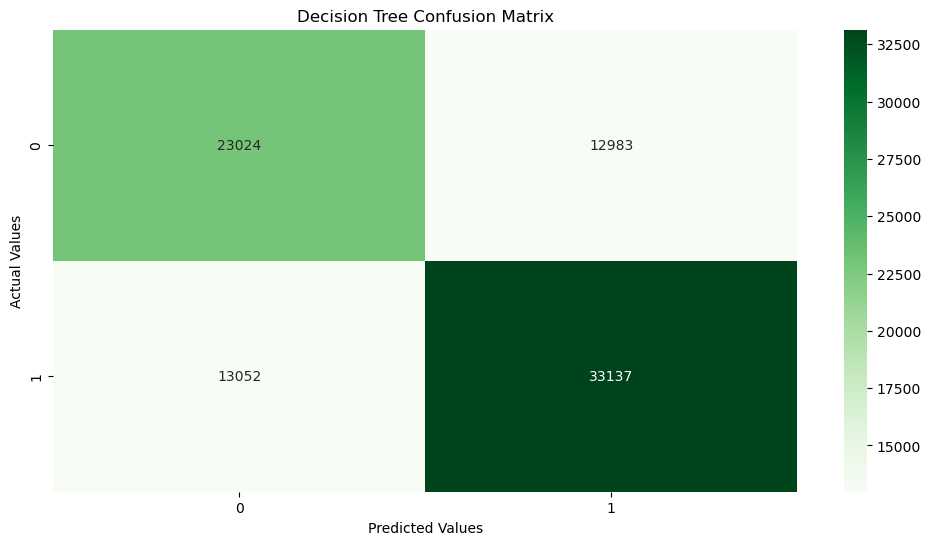

In [33]:
# Display the confusion matrix graph
cm=confusion_matrix(y_test,predictions)
plt.figure(figsize=(12,6))
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('DT_confusion_matrix.png')